# **California Housing Price Prediction**

This project focuses on predicting house prices in California using a Linear Regression model. The dataset contains information such as location, median income, and housing characteristics.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cal_housing.data")
df.head()

,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


In [3]:
# Column names
columns = [
    "longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
    "population", "households", "median_income", "median_house_value"
]

# Load the dataset
df = pd.read_csv("cal_housing.data", header=None, names=columns, delimiter=",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
# Summary statistics
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.898014   1425.476744    499.539680       3.870671   
std        421.247906   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.00000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# checking for null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

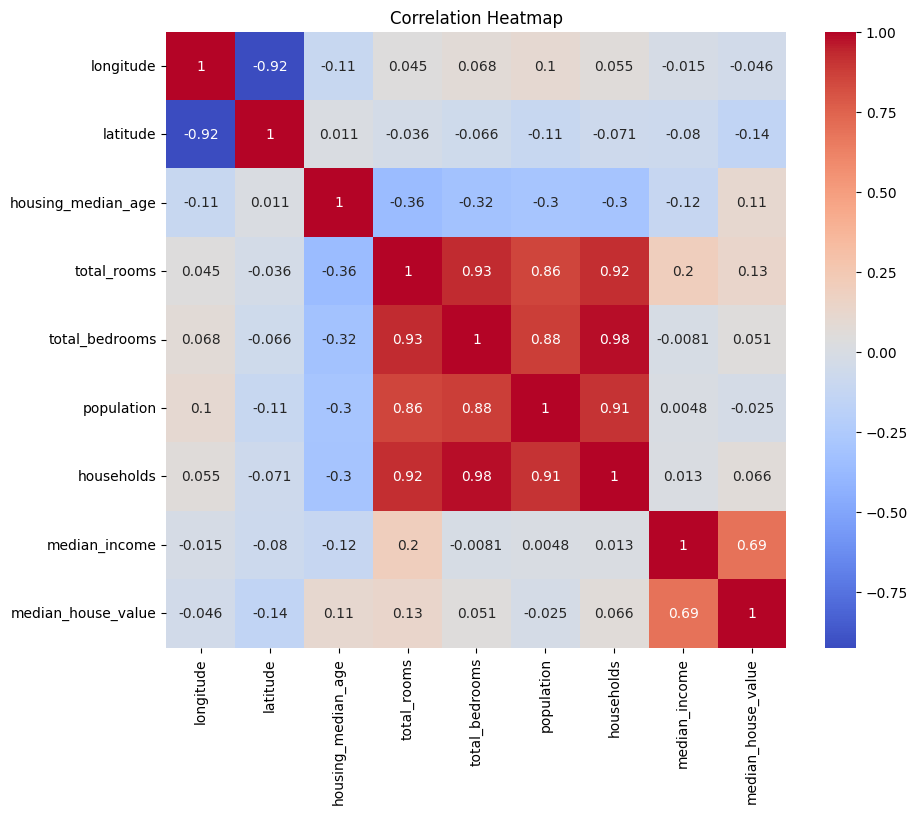

In [7]:
# coorelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

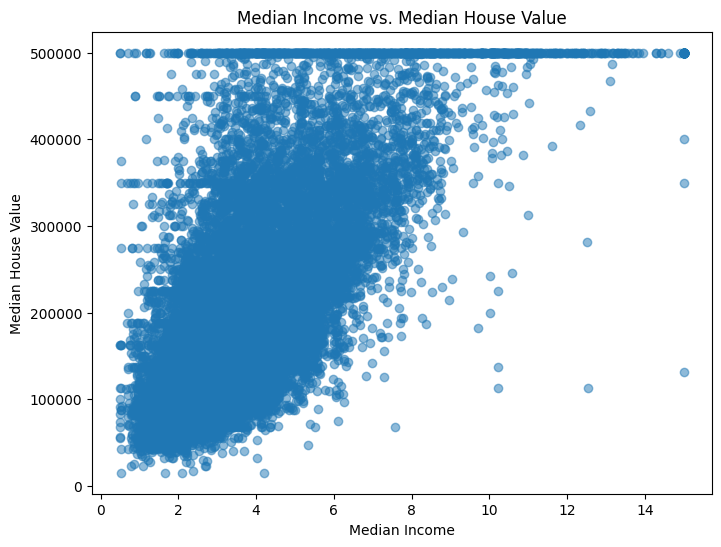

In [8]:
# Scatter plot: Median Income vs Median House Value
plt.figure(figsize=(8, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs. Median House Value")
plt.show()

Here we can observe that Median Income is a key predictor for house prices.


In [9]:
# Feature and Target Selection
X = df.drop("median_house_value", axis=1)  # All columns except target
y = df["median_house_value"]  # Target column

In [11]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Size: {X_train.shape}")
print(f"Testing Data Size: {X_test.shape}")

Training Data Size: (16512, 8)
Testing Data Size: (4128, 8)


In [12]:
from sklearn.linear_model import LinearRegression
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"\nMean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 4918556441.477801
R² Score: 0.6246548578993637


In [15]:
# Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importances:")
print(coefficients)


Feature Importances:
              Feature   Coefficient
7       median_income  40538.404387
2  housing_median_age   1182.809649
4      total_bedrooms    116.260128
6          households     46.342572
3         total_rooms     -8.187977
5          population    -38.492213
1            latitude -42450.071863
0           longitude -42632.391717


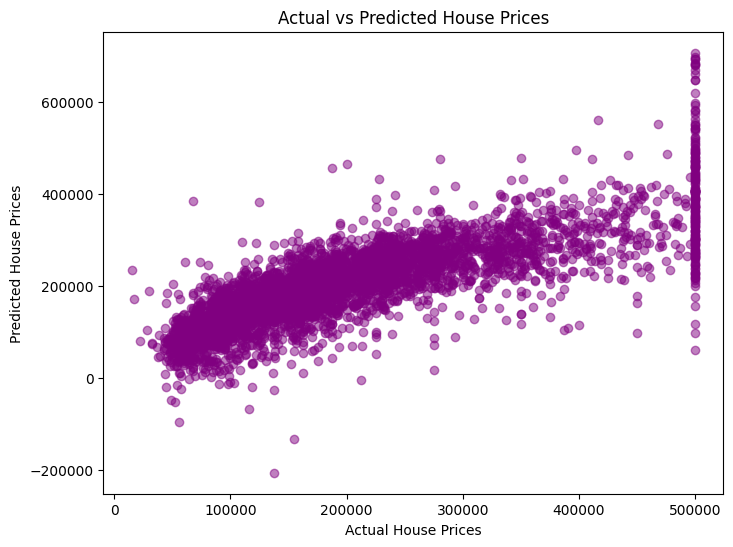

In [16]:
# Plot Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# **Summary of Findings**

1. The **R² score** indicates that the model explains **62.4%** of the variance in house prices.
2. **Median income** is the most influential feature, as seen from its scatter plot and high coefficient.
